# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url =f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
    
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | bogorodskoye
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | lihue
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | rice lake
Processing Record 8 of Set 1 | floro
Processing Record 9 of Set 1 | longyearbyen
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | hawaiian paradise park
Processing Record 12 of Set 1 | yurimaguas
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | udachny
Processing Record 15 of Set 1 | portland
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | glace bay
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | vadso
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | invercargill
P

In [28]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [32]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,9.71,95,2,1.82,ZA,1723061926
1,bogorodskoye,56.5500,37.8833,14.22,93,89,1.39,RU,1723062085
2,edinburgh of the seven seas,-37.0676,-12.3116,8.10,64,99,14.19,SH,1723061924
3,jamestown,42.0970,-79.2353,25.31,63,100,4.63,US,1723061920
4,lihue,21.9789,-159.3672,28.58,69,75,6.17,US,1723062089


In [34]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [35]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,9.71,95,2,1.82,ZA,1723061926
1,bogorodskoye,56.5500,37.8833,14.22,93,89,1.39,RU,1723062085
2,edinburgh of the seven seas,-37.0676,-12.3116,8.10,64,99,14.19,SH,1723061924
3,jamestown,42.0970,-79.2353,25.31,63,100,4.63,US,1723061920
4,lihue,21.9789,-159.3672,28.58,69,75,6.17,US,1723062089


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

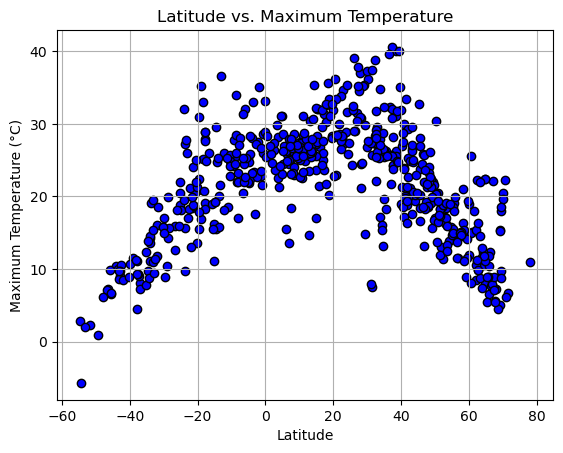

In [56]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color='blue', edgecolor='k')

# Incorporate the other graph properties
plt.title('Latitude vs. Maximum Temperature')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (°C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

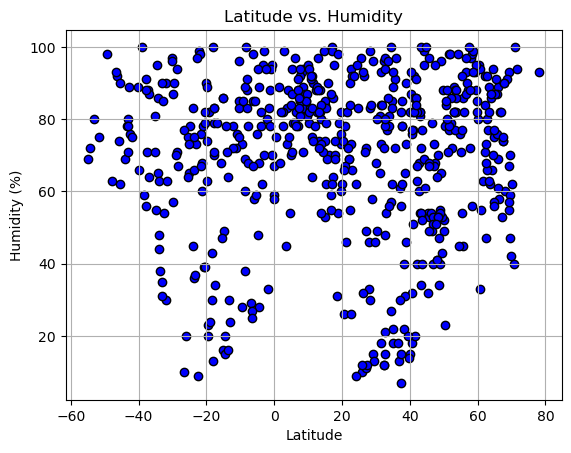

In [57]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color='blue', edgecolor='k')

# Incorporate the other graph properties
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

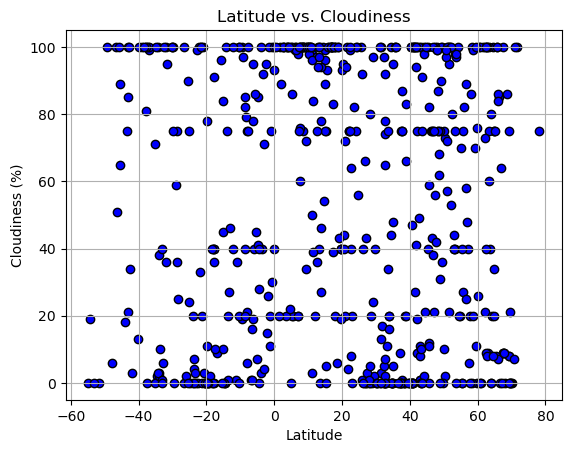

In [58]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color='blue', edgecolor='k')

# Incorporate the other graph properties
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

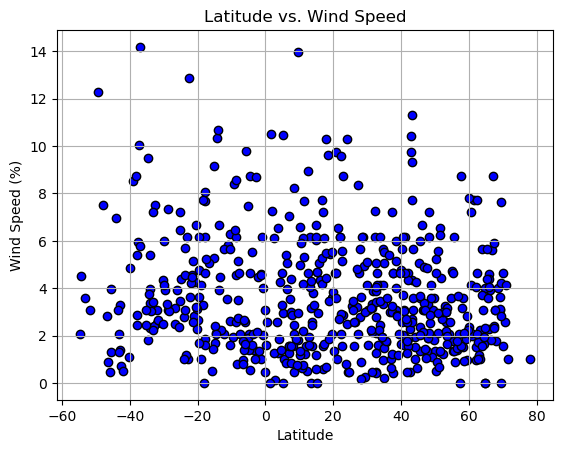

In [59]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color='blue', edgecolor='k')

# Incorporate the other graph properties
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [60]:
# Define a function to create Linear Regression plots
def plot_regression(x, y, xlabel, ylabel, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x=x, y=y, color='blue')
    
    # Plot the linear regression line
    plt.plot(x, slope * x + intercept, color='red', linewidth=2)
    
    # Annotate the plot with the equation and R^2 value
    plt.text(0.05, 0.9, f'Y = {slope:.2f}X + {intercept:.2f}', transform=plt.gca().transAxes,
             fontsize=12, verticalalignment='top')
    plt.text(0.05, 0.85, f'$R^2$ = {r_value**2:.2f}', transform=plt.gca().transAxes,
             fontsize=12, verticalalignment='top')
    
    # Set labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()
    
    return slope, intercept, r_value**2

In [61]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bogorodskoye,56.5500,37.8833,14.22,93,89,1.39,RU,1723062085
3,jamestown,42.0970,-79.2353,25.31,63,100,4.63,US,1723061920
4,lihue,21.9789,-159.3672,28.58,69,75,6.17,US,1723062089
6,rice lake,45.5061,-91.7382,23.82,54,40,3.60,US,1723061973
7,floro,61.5996,5.0328,17.98,63,100,7.72,NO,1723062093


In [62]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,9.71,95,2,1.82,ZA,1723061926
2,edinburgh of the seven seas,-37.0676,-12.3116,8.10,64,99,14.19,SH,1723061924
5,port-aux-francais,-49.3500,70.2167,0.99,98,100,12.28,TF,1723062090
9,puerto natales,-51.7236,-72.4875,2.25,75,0,3.09,CL,1723062095
11,yurimaguas,-5.9000,-76.0833,32.09,58,40,2.57,PE,1723062098


###  Temperature vs. Latitude Linear Regression Plot

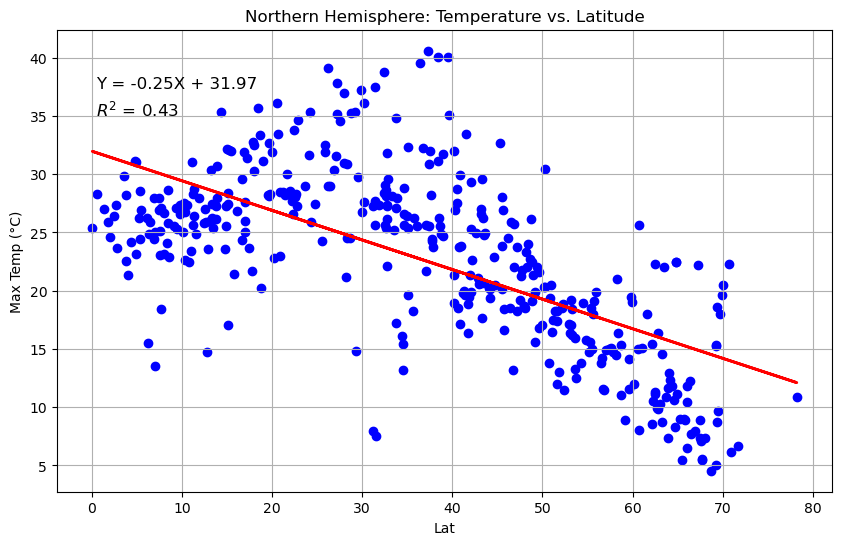

(-0.25391226251882204, 31.96912368144839, 0.4310747931182803)

In [70]:
# Linear regression on Northern Hemisphere
plot_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],
                'Lat', 'Max Temp (°C)', 'Northern Hemisphere: Temperature vs. Latitude')

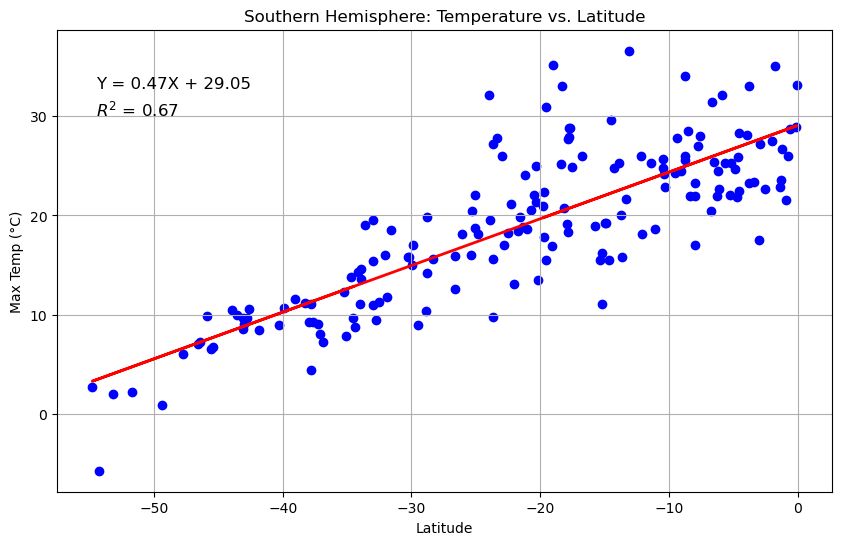

(0.46939359086123056, 29.052954325009722, 0.6748630175875092)

In [71]:
# Linear regression on Southern Hemisphere
plot_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],
                'Latitude', 'Max Temp (°C)', 'Southern Hemisphere: Temperature vs. Latitude')

**Discussion about the linear relationship:** 

The regression displays a negative correlation in the northern hemisphere.
As you move away from the equator the temperature decreases.

The regression displays a positive correlation in the southern hemisphere.
As you get closer to the equator the temperature increases.

### Humidity vs. Latitude Linear Regression Plot

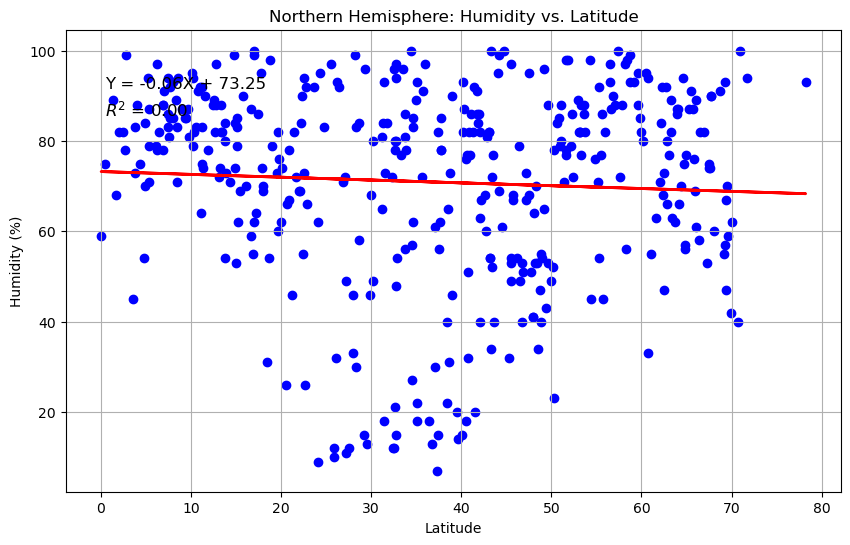

(-0.06265874605819098, 73.24515507339372, 0.0030938182516837775)

In [81]:
# Northern Hemisphere
plot_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],
                'Latitude', 'Humidity (%)', 'Northern Hemisphere: Humidity vs. Latitude')

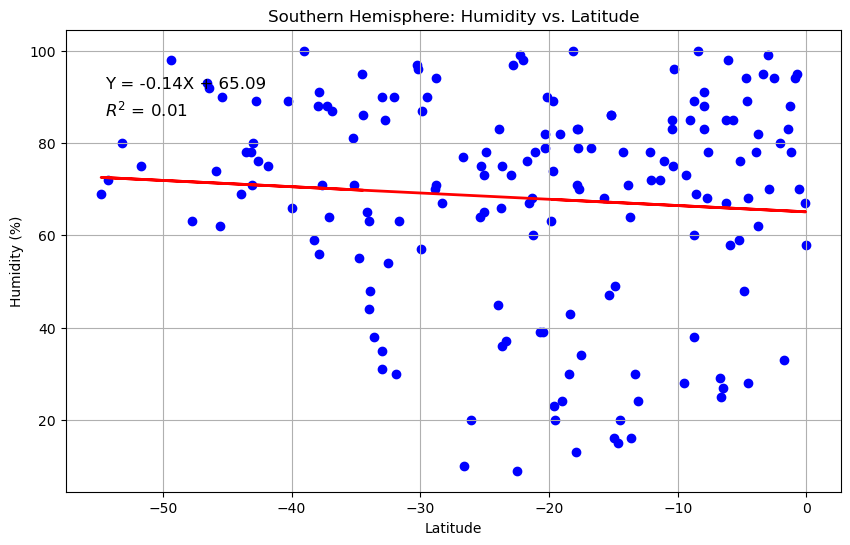

(-0.13612113881790336, 65.09042561336001, 0.00674868338103043)

In [73]:
# Southern Hemisphere
plot_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],
                'Latitude', 'Humidity (%)', 'Southern Hemisphere: Humidity vs. Latitude')

**Discussion about the linear relationship:** 

There is almost no correlation between humidity level and city position moving north from equator.

### Cloudiness vs. Latitude Linear Regression Plot

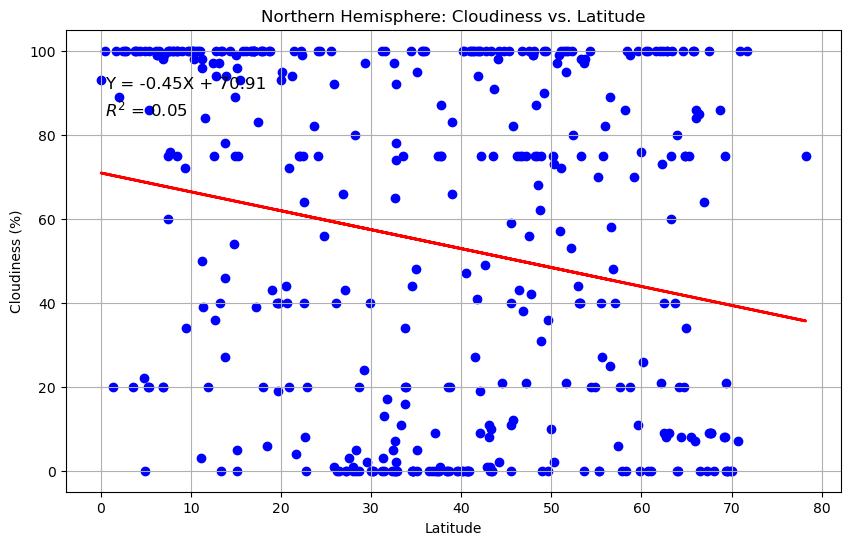

(-0.45069420973009644, 70.91305633855336, 0.047681356776749804)

In [75]:
# Northern Hemisphere
plot_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],
                'Latitude', 'Cloudiness (%)', 'Northern Hemisphere: Cloudiness vs. Latitude')

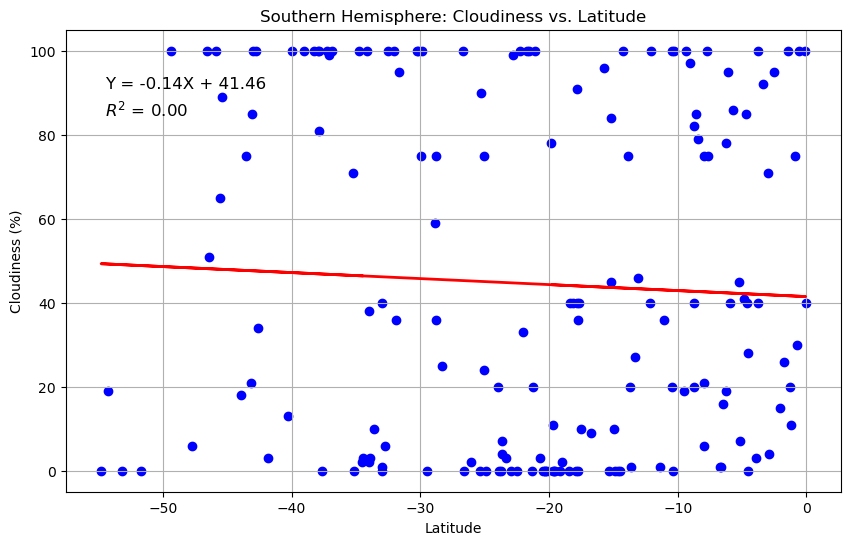

(-0.14292768978348347, 41.45809412292156, 0.0024346361794035654)

In [76]:
# Southern Hemisphere
plot_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],
                'Latitude', 'Cloudiness (%)', 'Southern Hemisphere: Cloudiness vs. Latitude')

**Discussion about the linear relationship:** 

There is no correlation between cloudiness and a distance from the equator for the cities. Cloudiness levels are widely spread across all latitudes along the whole Northern Hemisphere.
There is no correlation between the cloudiness and a latitude on the Southern Hemisphere. The level of cloudiness is ranging from 0% to 100% independent of a latitude.

### Wind Speed vs. Latitude Linear Regression Plot

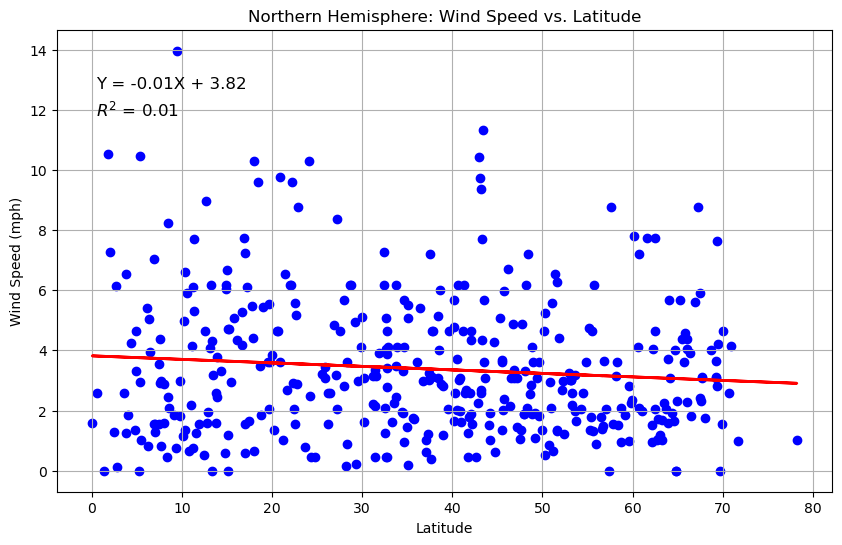

(-0.011662251009761974, 3.8182378478616164, 0.009834931238375075)

In [78]:
# Northern Hemisphere
plot_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],
                'Latitude', 'Wind Speed (mph)', 'Northern Hemisphere: Wind Speed vs. Latitude')


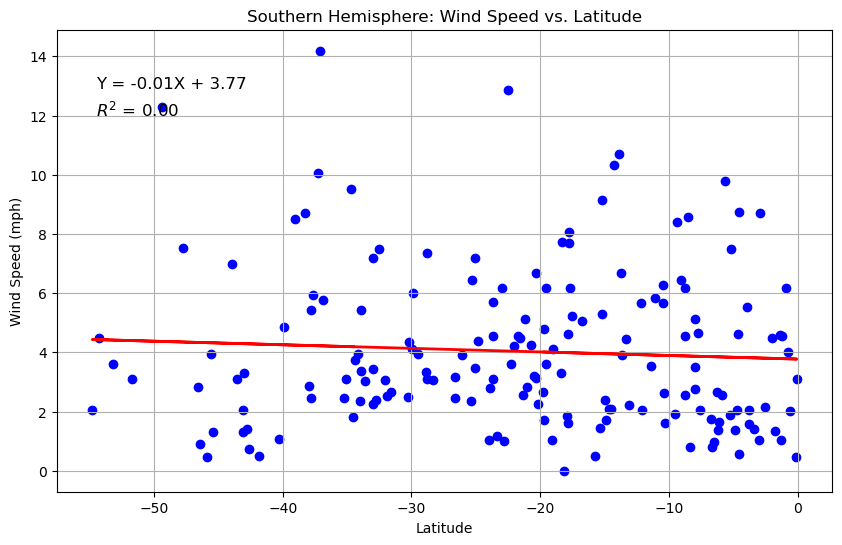

(-0.012064037641385384, 3.772698976545589, 0.003966806393183564)

In [80]:
# Southern Hemisphere
plot_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],
                'Latitude', 'Wind Speed (mph)', 'Southern Hemisphere: Wind Speed vs. Latitude')

**Discussion about the linear relationship:** 
The regression does not display much of a correlation between the data sets.